In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from tabulate import tabulate
import numpy as np
import seaborn as sns
import time

C:\Users\rafae\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
#imports 2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score


In [ ]:
#Immportando a Base
df = pd.read_csv("..\pns2019.csv")

In [ ]:
#identificar possiveis vazios
valores_vazios = ["?", "-"]
df = pd.read_csv('../pns2019.csv', na_values=valores_vazios)

df = df.replace({"?": np.nan, "-": np.nan})

In [ ]:
#filtrando base INTEIRA entre 20  e 40 anos
df_idade = df[(df['C008'] >= 20) & (df['C008'] <= 40)]

In [ ]:
#filtrando colunas consideradas importantes, dentro do df de depressao

df_idade = df_idade[[
  # Dimensão: Características do Individuo

  'C006', # Sexo
  'C008', # Idade do morador na data de referência

  # Dimensão: Fatores Sociais e Ambientais

  'M01401', # Com quantos familiares ou parentes pode contar em momentos bons ou ruins
  'M01501', # Com quantos amigos próximos ___ pode contar em momentos bons ou ruins (Sem considerar os familiares ou parentes
  'E01602', #Qual era o rendimento bruto mensal ou retirada que ___ fazia normalmente nesse trabalho?(valor em dinheiro)
  #'E01601', #...recebia/fazia normalmente nesse trabalho rendimento/retirada em dinheiro?
  #'F001011', #Em (mês da pesquisa) ___ recebia normalmente rendimento de aposentadoria ou pensão de instituto de previdência federal (INSS), estadual, municipal, ou do governo federal, estadual, municipal?
  #'F007011', #Em (mês da pesquisa), ___ recebia normalmente rendimento de pensão alimentícia, doação ou mesada em dinheiro de pessoa que não morava no domicílio?
  #'F008011', #Em (mês da pesquisa), ___ recebia normalmente rendimento de aluguel ou arrendamento?
  'VDF001',  #Em (mês da pesquisa), _______ recebia normalmente algum juro de caderneta de poupança e de outras aplicações financeiras, dividendos, programas sociais, seguro-desemprego, seguro defeso ou outros rendimentos?
  #'E01201', Qual era a ocupação (cargo ou função) que ___ tinha nesse trabalho
  'E017', # Quantas horas ___ trabalhava normalmente, por semana, nesse trabalho?
  'D00901', # Qual foi o curso mais elevado que ___frequentou
  'Q092',#***TEM DEPRESSÃO**Algum médico ou profissional de saúde mental (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de depressão?
  'A001',#Tipo do domicílio
  'A002010',#Qual é o material que predomina na construção das paredes externas deste domicílio?
  'A003010',#Material predominante na cobertura (telhado) do domicílio
  'A004010',#Qual é o material que predomina no piso deste domicílio
  'A01001',# Quantos cômodos têm este domicílio
  'J007', #Algum médico já deu o diagnóstico de alguma doença crônica, física ou mental, ou doença de longa duração (de mais de 6 meses de duração)
  'Q11006', # Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc?
  'N00101', # Considerando saúde como um estado de bem-estar físico e mental, e não somente a ausência de doenças, como você avalia o seu estado de saúde?

  ####Dimensão: Hábitos de Saúde

  'P034', # Nos últimos três meses, o(a) Sr(a) praticou algum tipo de exercício físico ou esporte?
  'P027', # Com que frequência o(a) Sr(a) costuma consumir alguma bebida alcoólica?
  'J01101', # Quando consultou um médico pela última vez
  'J014', # Nas duas últimas semanas, procurou algum lugar, serviço ou profissional de saúde para atendimento relacionado à própria saúde
  'N010', # Nas duas últimas semanas, com que frequência o(a) Sr(a) teve problemas no sono, como dificuldade para adormecer, acordar frequentemente à noite ou dormir mais do que de costume?
  'N011',
  'N011',
  'N012',
  'N013',
  'N014',
  'N015',
  'N016',
  'N017',
  'N018',
  #### Dimensão: Antropometria
  'P00102', # O(A) Sr(a) sabe seu peso?
  'P00104',
  'P00404',
  'J001', #ESTADO DE SAUDE
  'J00101', #BEM ESTAR FISICO E MENTAL
  'J002', #DEIXOU DE REALIZAR ATIVIDADES
  #COMIDA E ALIMENTACAO
  'P006', 'P00901','P01101','P013','P015','P02001','P01601','P018','P02002','P023',
  'P02501','P02602','P02601',

  #trabalho
  'E001', 'P050'



  ]].copy()

In [ ]:
df_idade.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86995 entries, 2 to 293723
Data columns (total 52 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   C006     86995 non-null  float64
 1   C008     86995 non-null  float64
 2   M01401   33321 non-null  float64
 3   M01501   33321 non-null  float64
 4   E01602   59737 non-null  float64
 5   VDF001   86995 non-null  float64
 6   E017     61133 non-null  float64
 7   D00901   73155 non-null  float64
 8   Q092     33321 non-null  float64
 9   A001     86995 non-null  float64
 10  A002010  86995 non-null  float64
 11  A003010  86995 non-null  float64
 12  A004010  86995 non-null  float64
 13  A01001   86995 non-null  float64
 14  J007     86995 non-null  float64
 15  Q11006   33321 non-null  float64
 16  N00101   33321 non-null  float64
 17  P034     33321 non-null  float64
 18  P027     33321 non-null  float64
 19  J01101   86995 non-null  float64
 20  J014     86995 non-null  float64
 21  N010     33321 n

### REMOVENDO VALORES VAZIOS

In [ ]:
#REMOVENDO LINHAS ONDE A PERGUNTA DE DEPRESSÃO ESTA NULA
df_idade = df_idade[df_idade['Q092'].notna()]


In [ ]:
#função para exibir o valor de valores nulos em cada coluna
def exibir_colunas_com_valores_nulos(df):

    # Calcula o número de valores nulos em cada coluna
    valores_nulos_por_coluna = df.isnull().sum()

    # Filtra as colunas com mais de 3000 valores nulos
    colunas_com_menos_de_700_nulos = valores_nulos_por_coluna[valores_nulos_por_coluna > 700]

    # Exibe o total de valores nulos para as colunas que têm mais de 3000 valores nulos
    print("Total de valores nulos para as colunas com mais de 3000 valores nulos:")
    print(colunas_com_menos_de_700_nulos)

exibir_colunas_com_valores_nulos(df_idade)


Total de valores nulos para as colunas com mais de 3000 valores nulos:
E01602    9272
E017      8867
D00901    4561
P00104     747
P00404     747
dtype: int64


### funcões necessarias

In [ ]:
#FUNÇÃO PARA RECEBER INTERVALOS
def definir_bins(*args):

    return bins

#FUNÇÃO PARA RECEBER OS VALORES DAS COLUNAS
def setar_valores_da_lista(*args):

    return valores

#FUNÇÃO PARA SUBSTITUIR OS REGISTROS DAS COLUNAS E DIMINUIR O TOTAL DO "value_counts"
def processar_coluna(df, nome_coluna):
    df[nome_coluna] = df[nome_coluna].astype(float)
    bins = definir_bins()
    valores = setar_valores_da_lista()
    df[nome_coluna] = pd.cut(df[nome_coluna], bins=bins, labels=valores)
    return df




In [ ]:
#função para exibir o valor de valores nulos em cada coluna
def exibir_valores(df, nome_coluna):

    # Calcula o número de valores nulos em cada coluna
    registros_salario = df[nome_coluna].value_counts()

    # Filtra as colunas com mais de 3000 valores nulos
    registros_under_500 = registros_salario[registros_salario > 500]

    # Exibe o total de valores nulos para as colunas que têm mais de 3000 valores nulos
    print("Total de valores nulos para as colunas com mais de 3000 valores nulos:")
    print(registros_under_500)




In [ ]:
#FUNÇÃO DE SUBSTITUIÇÃO DE VALORES NULOS
def valor_nulo_proporcao(df, nome_coluna):
    # Substituindo os valores nulos de acordo com as proporções
    null_indices = df[nome_coluna].isnull()
    for value, proportion in replacement_values.items():
        num_to_replace = int(null_indices.sum() * proportion)
        if num_to_replace > 0:
            replace_indices = np.random.choice(null_indices.index[null_indices], num_to_replace, replace=False)
            df_idade.loc[replace_indices, nome_coluna] = value
    return df

#### Removendo duplicatas

In [ ]:
#Excluindo linhas duplicadas
df_idade = df_idade.drop_duplicates(keep=False)

df_idade.shape

(33319, 52)

### AJUSTANDO COLUNAs

In [ ]:
print(df_idade['A01001'].describe())
print(df_idade['E017'].describe())
print(df_idade['E01602'].describe())
print(df_idade['D00901'].describe())


count    33319.000000
mean         5.523485
std          1.911523
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max         30.000000
Name: A01001, dtype: float64
count    24452.000000
mean        38.377556
std         12.653084
min          1.000000
25%         30.000000
50%         40.000000
75%         44.000000
max        120.000000
Name: E017, dtype: float64
count     24047.000000
mean       1955.631596
std        2644.977528
min          12.000000
25%         998.000000
50%        1200.000000
75%        2000.000000
max      120000.000000
Name: E01602, dtype: float64
count    28758.000000
mean         9.632520
std          1.975811
min          1.000000
25%          7.000000
50%         10.000000
75%         10.000000
max         15.000000
Name: D00901, dtype: float64


In [ ]:
df_idade['A01001'].value_counts()

A01001
5.0     10156
6.0      6401
4.0      5391
7.0      3730
3.0      2681
8.0      2001
9.0       926
2.0       760
10.0      532
11.0      239
12.0      163
1.0       118
13.0       84
14.0       55
15.0       30
16.0       17
17.0       11
18.0        8
19.0        6
20.0        5
21.0        2
26.0        1
30.0        1
22.0        1
Name: count, dtype: int64

In [ ]:
#Testando funções
bins = [0, 801, 1199, 1499, 1999, 3000, 4999, 9999, 120000 ] #valores dos intervalors
valores = [800, 1000, 1500, 2000, 3000, 5000, 10000, 25000] #novos valores das colunas

#Chamando as funções
#COLUNA SALARIO
processar_coluna(df_idade, 'E01602')
definir_bins(bins)
setar_valores_da_lista(valores)

print(df_idade['E01602'].value_counts())


E01602
1000     5508
800      5211
3000     4038
2000     3248
1500     2939
5000     1321
10000    1286
25000     496
Name: count, dtype: int64


In [ ]:
#Testando funções
bins = [0, 20, 30, 40, 120 ] #valores dos intervalors
valores = [20, 30, 40, 48] #novos valores das colunas

#HORAS TRABALHADAS
#Chamando as funções
processar_coluna(df_idade, 'E017')
definir_bins(bins)
setar_valores_da_lista(valores)

print(df_idade['E017'].value_counts())


E017
48    10068
40     8259
20     3259
30     2866
Name: count, dtype: int64


In [ ]:
#Testando funções
bins = [0, 8, 11, 15 ] #valores dos intervalors
valores = [7, 10, 12] #novos valores das colunas

 #COLUNA ESCOLARIDADE
#Chamando as funções
processar_coluna(df_idade, 'D00901')
definir_bins(bins)
setar_valores_da_lista(valores)

print(df_idade['D00901'].value_counts())


D00901
10    14255
7      8287
12     6216
Name: count, dtype: int64


In [ ]:
#Testando funções
bins = [0, 4, 5, 6, 7, 8, 9, 30] #valores dos intervalors
valores = [4,5,6,7,8,9,10] #novos valores das colunas

 #COLUNA ESCOLARIDADE
#Chamando as funções
processar_coluna(df_idade, 'A01001')
definir_bins(bins)
setar_valores_da_lista(valores)

print(df_idade['A01001'].value_counts())


A01001
5     10156
4      8950
6      6401
7      3730
8      2001
10     1155
9       926
Name: count, dtype: int64


#### Tratando valores nulos

In [ ]:
# Definindo os valores de substituição e suas proporções
#COLUNA ESCOLARIDADE
replacement_values = {7: 0.6, 12: 0.4}

valor_nulo_proporcao(df_idade, 'D00901')

print(df_idade['D00901'].value_counts())

D00901
10    14255
7      9924
12     8040
Name: count, dtype: int64


In [ ]:
#Substituindo valores vazios na coluna de escolaridade
df_idade.loc[df_idade['D00901'].isnull(), 'D00901'] = 7

In [ ]:
exibir_colunas_com_valores_nulos(df_idade)

Total de valores nulos para as colunas com mais de 3000 valores nulos:
E01602    9272
E017      8867
P00104     747
P00404     747
dtype: int64


In [ ]:
df_idade['E01602'].value_counts()

E01602
1000     5508
800      5211
3000     4038
2000     3248
1500     2939
5000     1321
10000    1286
25000     496
Name: count, dtype: int64

In [ ]:
# Definindo os valores de substituição e suas proporções
#COLUNA SALARIO
replacement_values = {1000: 0.23, 800: 0.23, 3000: 0.2, 2000: 0.2, 1500: 0.14}

valor_nulo_proporcao(df_idade, 'E01602')

print(df_idade['E01602'].value_counts())

exibir_colunas_com_valores_nulos(df_idade)

E01602
800      6399
1000     6376
3000     5305
2000     4841
1500     4237
5000     1321
10000    1286
25000     496
Name: count, dtype: int64
Total de valores nulos para as colunas com mais de 3000 valores nulos:
E01602    3058
E017      8867
P00104     747
P00404     747
dtype: int64


In [ ]:
# Definindo os valores de substituição e suas proporções
#COLUNA HORAS TRABALHADAS
replacement_values = {40: 0.3, 48: 0.3, 20: 0.2, 30: 0.2}

valor_nulo_proporcao(df_idade, 'E017')

print(df_idade['E017'].value_counts())

exibir_colunas_com_valores_nulos(df_idade)

E017
48    11729
40     9513
20     4677
30     4639
Name: count, dtype: int64
Total de valores nulos para as colunas com mais de 3000 valores nulos:
E01602    3058
E017      2761
P00104     747
P00404     747
dtype: int64


### CRIANDO COLUNA IMC


In [ ]:
#calculando
df_idade['P00404'] = df_idade['P00404']/100
df_idade['IMC'] = df_idade['P00104']/(df_idade['P00404'] * df_idade['P00404'])

print(df_idade['IMC'])

19        17.755682
26        24.654832
29        27.041644
34        27.041644
41        20.438166
            ...    
293682    20.199470
293685    22.720438
293702    33.333333
293713    32.744928
293720    17.921147
Name: IMC, Length: 33319, dtype: float64


In [ ]:
df_idade['IMC'].describe()

count    32572.000000
mean        26.212748
std          4.828794
min         12.908315
25%         22.862534
50%         25.529645
75%         28.888889
max         56.191467
Name: IMC, dtype: float64

In [ ]:
#Testando funções
bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9,  57] #valores dos intervalors
valores = [18, 24, 29, 34, 39, 45] #novos valores das colunas

 #COLUNA iMC
#Chamando as funções
processar_coluna(df_idade, 'IMC')
definir_bins(bins)
setar_valores_da_lista(valores)

print(df_idade['IMC'].value_counts())

IMC
24    13664
29    11843
34     4646
39     1302
18      709
45      408
Name: count, dtype: int64


In [ ]:
# Definindo os valores de substituição e suas proporções
#COLUNA IMC
replacement_values = {34: 0.3, 39: 0.3, 18: 0.2, 45: 0.2}

valor_nulo_proporcao(df_idade, 'IMC')

print(df_idade['IMC'].value_counts())

exibir_colunas_com_valores_nulos(df_idade)

IMC
24    13664
29    11843
34     4751
39     1444
18      835
45      557
Name: count, dtype: int64
Total de valores nulos para as colunas com mais de 3000 valores nulos:
E01602    3058
E017      2761
P00104     747
P00404     747
dtype: int64


##### EXCLUINDO COLUNAS PESO E ALTURA, JA TEMOS O IMC

In [ ]:
df_idade.shape

(33319, 53)

In [ ]:
df_idade.drop(columns=['P00104'], inplace=True)
df_idade.drop(columns=['P00404'], inplace=True)

df_idade.shape

(33319, 51)

#### REMOVENDO LINHAS COM REGISTROS VAZIOS

In [ ]:
df_idade.dropna(axis=0, inplace=True)

In [ ]:
df_idade.shape

(28252, 51)

In [ ]:
exibir_colunas_com_valores_nulos(df_idade)

Total de valores nulos para as colunas com mais de 3000 valores nulos:
Series([], dtype: int64)


### Balanceamento da base

In [ ]:
#Separando  por X e Y
X = df_idade.drop('Q092', axis=1)
y = df_idade['Q092']

<Axes: ylabel='count'>

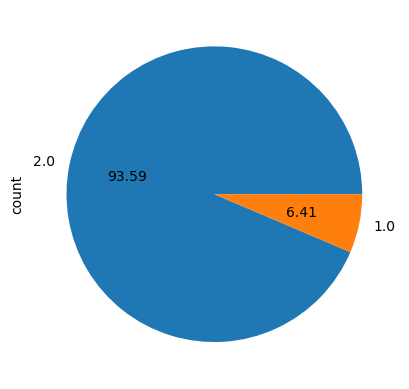

In [ ]:
#Verificando proporção da base
y.value_counts().plot.pie(autopct='%.2f')

In [ ]:
#Proporção
y.value_counts()/y.shape[0]*100

Q092
2.0    93.589834
1.0     6.410166
Name: count, dtype: float64

In [ ]:
#Separando por modelo de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state=42, stratify=y)

In [ ]:
#verificando proporção do treino
y_train.value_counts()/y_train.shape[0]*100

Q092
2.0    93.591505
1.0     6.408495
Name: count, dtype: float64

In [ ]:
#verificando proporção do teste
y_test.value_counts()/y_test.shape[0]*100

Q092
2.0    93.586444
1.0     6.413556
Name: count, dtype: float64

#### RESULTADOS ANTES DO BALANCEAMENTO

In [ ]:
#testando modelo antes do balanceamento
#Iremos comparar o precision e o recall antes e depois do balanceamento, para sabermos se deu certo
#importando modelo}
from sklearn.tree import DecisionTreeClassifier
#defininfo classificador
clf = DecisionTreeClassifier(random_state=0)
#Fazendo Fit com os dados
clf = clf.fit(X_train, y_train)

In [ ]:
#prev do resultado
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.31486880466472306

In [ ]:
from sklearn.metrics import recall_score
#verificando recall
recall_score(y_test,y_pred)

0.3612040133779264

In [ ]:
from sklearn.metrics import confusion_matrix
#gerando matriz de confusão
confusion_matrix(y_test,y_pred)

array([[ 216,  382],
       [ 470, 8256]], dtype=int64)

#### RESULTADOS APOS BALANCEAMENTO

In [ ]:
#Importando random UnderSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
#definindo o Random UnderSampler
rus = RandomUnderSampler(random_state=42)

In [ ]:
#aplicando pra x e y (ambos de treino, sempre de treino)
X_res, y_res = rus.fit_resample(X_train, y_train)

<Axes: ylabel='count'>

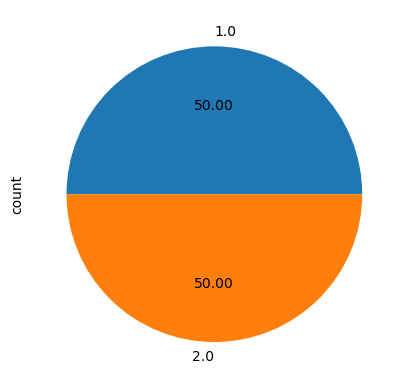

In [ ]:
#Visualizando graficamente o balanceamento
y_res.value_counts().plot.pie(autopct='%.2f')

In [ ]:
#Visualizando numericamente
y_res.value_counts()

Q092
1.0    1213
2.0    1213
Name: count, dtype: int64

In [ ]:
#defininfo classificador
clfAD = DecisionTreeClassifier(random_state=0, criterion='gini')

#Fazendo Fit com os dados
clfAD = clfAD.fit(X_res, y_res)

#prev do resultado
Y_predAD = clfAD.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracyAD = accuracy_score(y_test, Y_predAD)

print("Acurácia do modelo de Arvore de decisão:", accuracyAD)

Acurácia do modelo de Arvore de decisão: 0.7895752895752896


In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test,Y_predAD)

0.2029616724738676

In [ ]:
from sklearn.metrics import recall_score
#verificando recall
recall_score(y_test,Y_predAD)

0.7792642140468228

## RANDOM FOREST

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# Criando o modelo de Random Forest com os parâmetros especificados
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Treinando o modelo
rf_model.fit(X_res, y_res)

# Fazendo previsões
y_predRF = rf_model.predict(X_test)

# Avaliando a acurácia do modelo
accuracy = accuracy_score(y_test, y_predRF)
print("Acurácia do modelo de Random Forest:", accuracy)

Acurácia do modelo de Random Forest: 0.8036250536250537


In [ ]:
precision_score(y_test,y_predRF)


0.23506660936828536

In [ ]:
#verificando recall
recall_score(y_test,y_predRF)

0.9147157190635451